<a href="https://colab.research.google.com/github/Dheerajkumar76/ML_LabAssignment-2/blob/main/ML_Assignment_4165.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab Assignment -4
Name:Dheerajkumar R
Reg No: BL.EN.U4AIE23165



Conversion of images dataset to CSV file

In [9]:
# Install necessary libraries (only needed if not already installed)
!pip install tensorflow pandas numpy

# Import required libraries
import numpy as np
import pandas as pd
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [10]:
# Load the ResNet50 model pre-trained on ImageNet, without the classification layer
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)  # Extract features from the last global average pooling layer


In [11]:
# ------------------------------------------------------
# Function 1: Extract Features from an Image
# ------------------------------------------------------
def extract_features(img_path, model):
    """
    Extracts features from an image using a pre-trained ResNet50 model.
    Returns a flattened feature vector.
    """
    img = image.load_img(img_path, target_size=(224, 224))  # Resize image
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model
    img_array = preprocess_input(img_array)  # Normalize the image

    features = model.predict(img_array)  # Get features
    return features.flatten()  # Convert to 1D vector


In [12]:
# ------------------------------------------------------
# Function 2: Convert Image Dataset to CSV
# ------------------------------------------------------
def convert_images_to_csv(dataset_path, model, output_csv):
    """
    Extracts features from all images in the dataset and saves them into a CSV file.
    """
    data = []  # List to store feature vectors
    labels = []  # List to store class labels

    # Get class names (folder names)
    class_names = os.listdir(dataset_path)

    for class_index, class_name in enumerate(class_names):
        class_folder = os.path.join(dataset_path, class_name)
        if not os.path.isdir(class_folder):
            continue  # Skip non-folder files

        # Process each image in the class folder
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)

            try:
                features = extract_features(img_path, model)  # Extract features
                data.append(features)  # Append feature vector
                labels.append(class_index)  # Append class label (integer)
            except:
                print(f"Skipping {img_name} due to an error.")

    # Convert to a Pandas DataFrame
    df = pd.DataFrame(data)
    df['label'] = labels  # Add class labels

    # Save as CSV file
    df.to_csv(output_csv, index=False)

!ls /content/drive/MyDrive/



 ABCidcard.pdf
'Adobe Scan Apr 01, 2023 (3).pdf'
'Adobe Scan Apr 01, 2023 (4).pdf'
'can u find the engines1 ppt in my documents?.gdoc'
'Colab Notebooks'
 DheerajXAFactorthm.pdf
 Discrete_Math_Project_EndSem.pptx
'Engines 1.pptx'
'Engines 1.pptx.pdf'
 FCFS2.py
 FCFS.py
 Flower
'Getting started.pdf'
"I am sharing 'ICSE 2019 Maths Question Paper.pdf' with you from WPS Office"
'mkf-pnwz-brf – 4 Aug 2021.gjam'
'mkf-pnwz-brf – 9 Aug 2021.gjam'
 ML_Lab_3.ipynb
 SJF.py
 The.Path.to.Freedom.pdf
'The Project Gutenberg eBook of Chaucer (1).docx'
'The Project Gutenberg eBook of Chaucer (2).docx'
'The Project Gutenberg eBook of Chaucer (3).docx'
'The Project Gutenberg eBook of Chaucer.docx'


In [13]:
# Define dataset path and output CSV file path
dataset_path = '/content/drive/MyDrive/Flower/flower_subset/train'  # Update with actual path
output_csv = '/content/drive/MyDrive/Flower/flower_features.csv'  # Save CSV in Google Drive

# Convert images to CSV
convert_images_to_csv(dataset_path, model, output_csv)

print("Feature extraction completed! CSV saved at:", output_csv)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 


Confusion Matrix (Train):
 [[18  0  0  0  0  0  0  1  0  0]
 [ 0 21  0  0  0  0  0  1  0  0]
 [ 0  0 18  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  3  0  0]
 [ 0  2  1  0  1 16  0  0  2  0]
 [ 0  0  0  0  2  0 20  0  0  0]
 [ 0  0  0  0  3  0  0 13  0  0]
 [ 2  0  0  0  0  0  0  0 24  0]
 [ 3  2  0  0  1  0  1  0  0 15]]

Confusion Matrix (Test):
 [[ 9  1  0  0  1  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0]
 [ 1  0  9  0  0  0  0  1  1  0]
 [ 0  0  0 11  1  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0]
 [ 0  0  1  1  0  5  0  0  1  0]
 [ 0  0  0  0  2  0  5  0  0  1]
 [ 0  0  1  0  5  0  0  8  0  0]
 [ 1  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  2  0  0  0  0  6]]

Classification Report (Train):
                    0          1          2     3          4          5  \
precision   0.782609   0.840000   0.947368   1.0   0.758621   1.000000   
recall      0.947368   0.954545   1.000000   1.0   0.880000   0.727273   
f1-score    0.857143   0.893

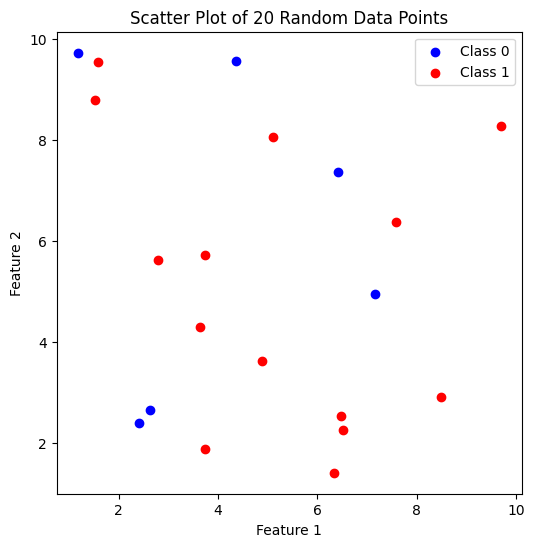

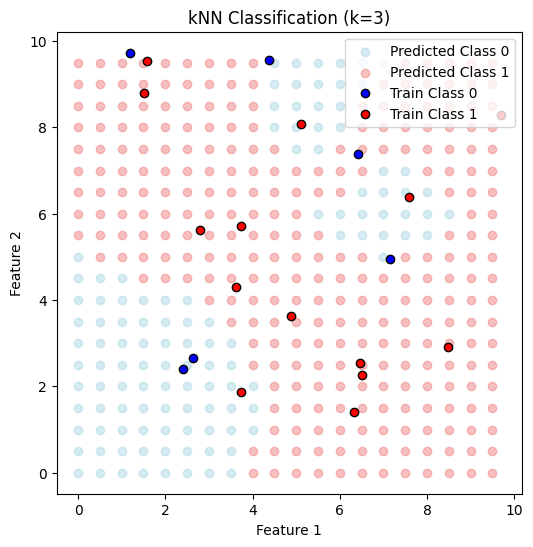

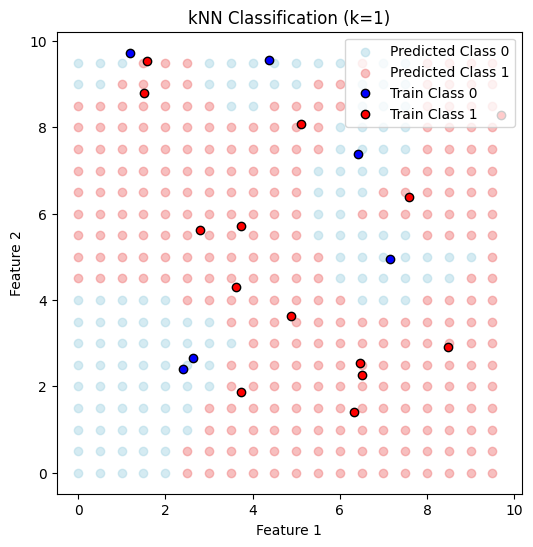

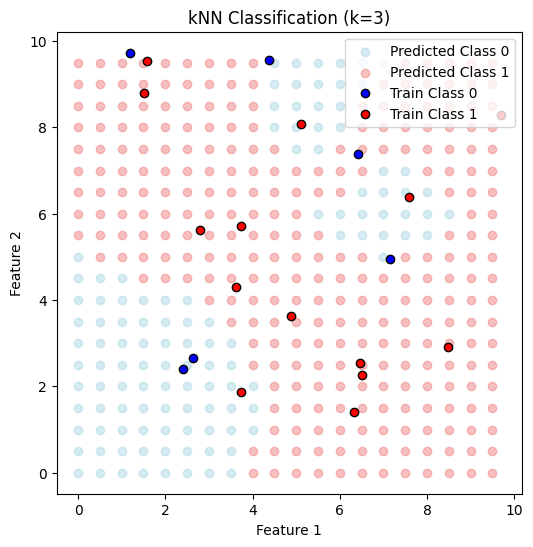

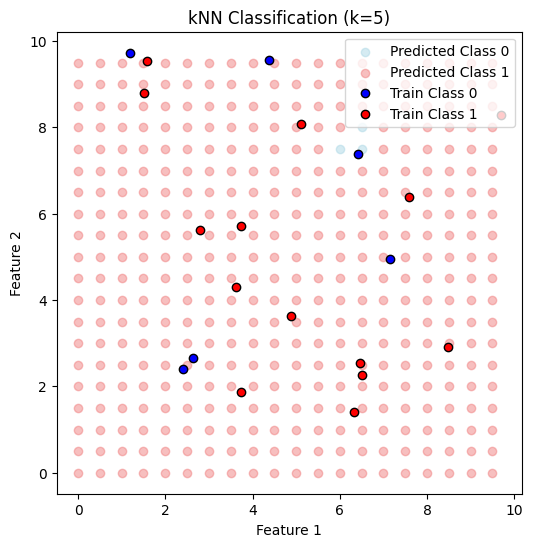

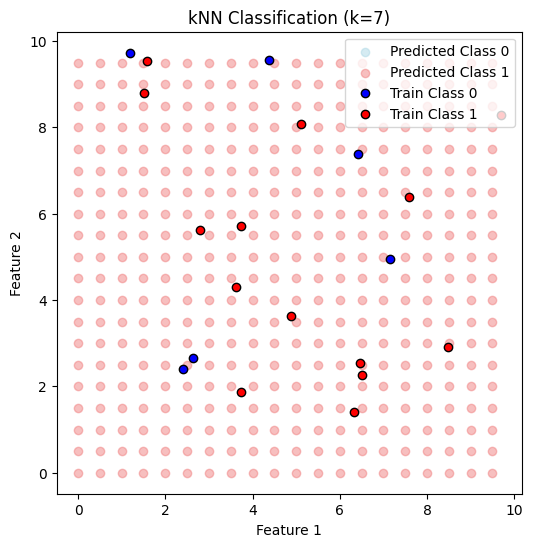

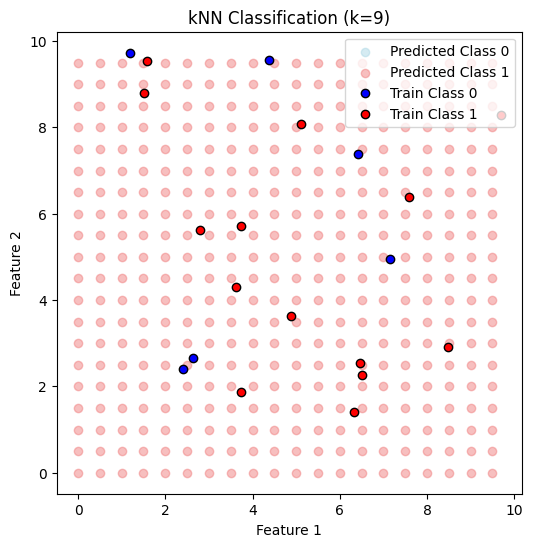


Best k (GridSearchCV): {'n_neighbors': 4}
Best k (RandomizedSearchCV): {'n_neighbors': 3}


In [23]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# ------------------------------------------------------
# Load Dataset
# ------------------------------------------------------
def load_dataset(csv_path):
    """
    Loads the dataset from a CSV file.
    """
    df = pd.read_csv(csv_path)
    X = df.iloc[:, :-1].values  # Features
    y = df.iloc[:, -1].values   # Labels
    return X, y

# ------------------------------------------------------
# Function: Evaluate Model & Determine Fit Type
# ------------------------------------------------------
def evaluate_model(knn_model, X_train, X_test, y_train, y_test):
    """
    Evaluates the kNN model and returns confusion matrix, precision, recall, and F1-score.
    Also determines if the model is underfitting, overfitting, or a regular fit.
    """
    # Predictions
    y_train_pred = knn_model.predict(X_train)
    y_test_pred = knn_model.predict(X_test)

    # Compute Confusion Matrices
    train_cm = confusion_matrix(y_train, y_train_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)

    # Classification Reports
    train_report = classification_report(y_train, y_train_pred, output_dict=True)
    test_report = classification_report(y_test, y_test_pred, output_dict=True)

    # Compute Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Determine Model Fit Type
    if train_accuracy < 0.6 and test_accuracy < 0.6:
        fit_type = "Underfitting"
    elif train_accuracy > 0.9 and test_accuracy < 0.7:
        fit_type = "Overfitting"
    else:
        fit_type = "Regular Fit"

    return train_cm, test_cm, train_report, test_report, train_accuracy, test_accuracy, fit_type


# ------------------------------------------------------
# Function: Compute Regression Metrics (A2)
# ------------------------------------------------------
def compute_regression_metrics(y_true, y_pred):
    """
    Computes Mean Squared Error (MSE), Root Mean Squared Error (RMSE),
    Mean Absolute Percentage Error (MAPE), and R² Score.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return mse, rmse, mape, r2


# ------------------------------------------------------
# Function: Generate Training Data & Plot Scatter Plot (A3)
# ------------------------------------------------------
def generate_training_data():
    """
    Generates 20 data points with 2 random features (X, Y), assigns them to 2 classes,
    and plots a scatter plot.
    """
    np.random.seed(42)
    X_train = np.random.uniform(1, 10, (20, 2))  # Generate random (X, Y) features
    y_train = np.random.choice([0, 1], size=20)  # Assign classes randomly

    # Scatter plot of data points
    plt.figure(figsize=(6, 6))
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label="Class 0")
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label="Class 1")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Scatter Plot of 20 Random Data Points")
    plt.legend()
    plt.show()

    return X_train, y_train

# ------------------------------------------------------
# Function: Generate Test Data, Classify Using kNN & Plot Results (A4)
# ------------------------------------------------------
def generate_test_data_and_classify(X_train, y_train, k=3):
    """
    Generates a test dataset and classifies the test points using kNN (k=3).
    Plots the decision boundary.
    """
    # Generate test points
    x_values = np.arange(0, 10, 0.5)
    y_values = np.arange(0, 10, 0.5)
    X_test = np.array([[x, y] for x in x_values for y in y_values])

    # Train kNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict class for test points
    y_test_pred = knn.predict(X_test)

    # Scatter plot of test data
    plt.figure(figsize=(6, 6))
    plt.scatter(X_test[y_test_pred == 0, 0], X_test[y_test_pred == 0, 1], color='lightblue', alpha=0.5, label="Predicted Class 0")
    plt.scatter(X_test[y_test_pred == 1, 0], X_test[y_test_pred == 1, 1], color='lightcoral', alpha=0.5, label="Predicted Class 1")

    # Scatter plot of training data (original points)
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label="Train Class 0", edgecolors='black')
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label="Train Class 1", edgecolors='black')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"kNN Classification (k={k})")
    plt.legend()
    plt.show()

    return X_test, y_test_pred
# ------------------------------------------------------
# Function: Classify for Multiple k Values & Plot Scatter Plots (A5, A6)
# ------------------------------------------------------
def classify_for_multiple_k(X_train, y_train, k_values):
    """
    Runs kNN classification for multiple k values, plots results for each k, and returns predictions.
    """
    results = {}

    for k in k_values:
        # Generate test points
        x_values = np.arange(0, 10, 0.5)
        y_values = np.arange(0, 10, 0.5)
        X_test = np.array([[x, y] for x in x_values for y in y_values])

        # Train kNN model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Predict class for test points
        y_test_pred = knn.predict(X_test)
        results[k] = (X_test, y_test_pred)

        # Plot the classification results
        plt.figure(figsize=(6, 6))
        plt.scatter(X_test[y_test_pred == 0, 0], X_test[y_test_pred == 0, 1], color='lightblue', alpha=0.5, label="Predicted Class 0")
        plt.scatter(X_test[y_test_pred == 1, 0], X_test[y_test_pred == 1, 1], color='lightcoral', alpha=0.5, label="Predicted Class 1")

        # Scatter plot of training data (original points)
        plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label="Train Class 0", edgecolors='black')
        plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label="Train Class 1", edgecolors='black')

        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.title(f"kNN Classification (k={k})")
        plt.legend()
        plt.show()

    return results


# ------------------------------------------------------
# A7: Find Best k Using GridSearchCV & RandomizedSearchCV
# ------------------------------------------------------
def find_best_k(X_train, y_train):
    """
    Performs hyperparameter tuning to find the best k using GridSearchCV and RandomizedSearchCV.
    """
    param_grid = {'n_neighbors': list(range(1, 21))}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    random_search = RandomizedSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_iter=10)
    random_search.fit(X_train, y_train)

    return grid_search.best_params_, random_search.best_params_

# ------------------------------------------------------
# MAIN PROGRAM EXECUTION
# ------------------------------------------------------

# Load Dataset
csv_path = "/content/drive/MyDrive/Flower/flower_features.csv"
X, y = load_dataset(csv_path)

# Split Dataset into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train kNN Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Evaluate kNN Model
train_cm, test_cm, train_report, test_report, train_acc, test_acc, model_outcome = evaluate_model(knn, X_train, X_test, y_train, y_test)

# Print Results
print("\nConfusion Matrix (Train):\n", train_cm)
print("\nConfusion Matrix (Test):\n", test_cm)
print("\nClassification Report (Train):\n", pd.DataFrame(train_report))
print("\nClassification Report (Test):\n", pd.DataFrame(test_report))
print("\nTrain Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("\n🟢 Model Outcome:", model_outcome)

# Get model predictions for test set
y_test_pred = knn.predict(X_test)

# Compute Regression Metrics (A2)
mse, rmse, mape, r2 = compute_regression_metrics(y_test, y_test_pred)

# Print the Results
print("\n🔹 A2: Regression Metrics")
print("MSE (Mean Squared Error):", mse)
print("RMSE (Root Mean Squared Error):", rmse)
print("MAPE (Mean Absolute Percentage Error):", mape)
print("R² Score:", r2)

# Generate & Plot Training Data (A3)
X_train_synthetic, y_train_synthetic = generate_training_data()


# Generate Test Data & Classify Using kNN (A4)
X_test_synthetic, y_test_synthetic = generate_test_data_and_classify(X_train_synthetic, y_train_synthetic, k=3)

# Run kNN Classification for Multiple k Values & Plot (A5, A6)
k_values = [1, 3, 5, 7, 9]
results = classify_for_multiple_k(X_train_synthetic, y_train_synthetic, k_values)


# A7: Find Best k Using Hyperparameter Tuning
best_k_grid, best_k_random = find_best_k(X_train, y_train)

# Display Best k Values
print("\nBest k (GridSearchCV):", best_k_grid)
print("Best k (RandomizedSearchCV):", best_k_random)
